### This will be the continuously tested version. Testing mostly done in Spyder, then the correct code is uploaded here.

In [11]:
import tkinter as tk
from tkinter import simpledialog, scrolledtext
from tkinter import messagebox #this is for pop up when illegal characters was input
import time
import csv
import os

def open_hours_rating_window(root, data):
    def submit_hours():
        user_input = hours_entry.get()
        try:
            # Convert to float first to check if it's a valid number
            hours = float(user_input)  # This will raise an error if the input is not a valid number
            if 0.0 <= hours <= 168.0:
                data['WorkHours'] = user_input  # Save the valid input as a string
                hours_window.destroy()
                open_supervisor_rating_1_window(root, data)
            else:
                raise ValueError("Hours must be between 0 and 168.")
        except ValueError:
            error_label.config(text="Please enter a valid number (decimals allowed).")

    hours_window = tk.Toplevel(root)
    hours_window.title("Questionnaire: Hours Rating")
    hours_window.geometry("500x200")
    tk.Label(hours_window, text="How many hours a week do you work? (numbers only, decimals allowed)").pack(pady=10)
    hours_entry = tk.Entry(hours_window)
    hours_entry.pack(pady=10)
    submit_button = tk.Button(hours_window, text="Next", command=submit_hours)
    submit_button.pack(pady=10)
    error_label = tk.Label(hours_window, text="", fg="red")  # Error message label
    error_label.pack(pady=10)

def open_supervisor_rating_1_window(root, data):
    def submit_rating_1():
        user_input = rating_entry.get()
        try:
            rating = float(user_input)  # Convert to float and validate
            if 0.0 <= rating <= 10.0:
                data['SupervisorRating1'] = user_input
                rating_1_window.destroy()
                open_supervisor_rating_2_window(root, data)    
            else:
                raise ValueError("Rating must be between 0 and 10.")
        except ValueError:
            error_label.config(text="Please enter a valid rating (0.0-10.0).")

    rating_1_window = tk.Toplevel(root)
    rating_1_window.title("Questionnaire: Supervisor Rating 1")
    rating_1_window.geometry("500x200")
    tk.Label(rating_1_window, text="Please rate your relationship with your supervisor: \n(0-Extremely bad, 10-Extremely good)").pack(pady=20)
    rating_entry = tk.Entry(rating_1_window)
    rating_entry.pack()
    next_button = tk.Button(rating_1_window, text="Next", command=submit_rating_1)
    next_button.pack(pady=20)
    error_label = tk.Label(rating_1_window, text="", fg="red")  # Error message label
    error_label.pack()

def open_supervisor_rating_2_window(root, data):
    def submit_rating_2():
        user_input = rating_entry.get()
        try:
            rating = float(user_input)  # Convert to float and validate
            if 0.0 <= rating <= 10.0:
                data['SupervisorRating2'] = user_input
                rating_2_window.destroy()
                open_final_summary_window(root, data)
            else:
                raise ValueError("Rating must be between 0 and 10.")
        except ValueError:
            error_label.config(text="Please enter a valid rating (0.0-10.0).")

    rating_2_window = tk.Toplevel(root)
    rating_2_window.title("Questionnaire: Supervisor Rating 2")
    rating_2_window.geometry("500x200")
    tk.Label(rating_2_window, text="Please rate your supervisor: \n(0-Extremely bad, 10-Extremely good)").pack(pady=20)
    rating_entry = tk.Entry(rating_2_window)
    rating_entry.pack()
    next_button = tk.Button(rating_2_window, text="Next", command=submit_rating_2)
    next_button.pack(pady=20)
    error_label = tk.Label(rating_2_window, text="", fg="red")  # Error message label for displaying input errors
    error_label.pack()

def open_final_summary_window(root, data):
    summary_window = tk.Toplevel(root)
    summary_window.title("Summary: Questionnaire")
    summary_window.geometry("300x300")
    text_display = (f"ID: {data['ID']}\n"
                    f"Work hours: {data['WorkHours']}\n"
                    f"Supervisor relationship rating: {data['SupervisorRating1']}\n"
                    f"Supervisor rating: {data['SupervisorRating2']}")
    summary_label = tk.Label(summary_window, text=text_display, justify="left", wraplength=280)
    summary_label.pack(pady=20)
    save_data(data, "/Users/ariel/Desktop/Spring24/525/GUIproject/GUIdata.csv")
    close_button = tk.Button(summary_window, text="Save and Exit", command=lambda: end_and_save(root))
    close_button.pack(side=tk.LEFT, padx=10, pady=5)
    return_button = tk.Button(summary_window, text="Return to Beginning", command=lambda: return_to_start(summary_window, root))
    return_button.pack(side=tk.RIGHT, padx=10, pady=5)

def save_data(data, filepath):
    headers = ["ID", "TotalKeystrokes1", "TotalBackspaces1", "TimeElapsed1", "InputText1", "StressRating1", 
               "TotalKeystrokes2", "TotalBackspaces2", "TimeElapsed2", "InputText2", "StressRating2",
               "TotalKeystrokes3", "TotalBackspaces3", "TimeElapsed3", "InputText3", "StressRating3",
               "TotalKeystrokes4", "TotalBackspaces4", "TimeElapsed4", "InputText4", "StressRating4",
               "WorkHours", "SupervisorRating1", "SupervisorRating2"]
    file_exists = os.path.isfile(filepath)
    with open(filepath, 'a', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=headers)
        if not file_exists:
            writer.writeheader()
        writer.writerow(data)

def open_summary_window(data, root, round_index):
    summary_window = tk.Toplevel(root)
    summary_window.title(f"Summary of Your Input - Round {round_index}")
    summary_window.geometry("300x200")
    text_display = (f"ID: {data['ID']}\n"
                    f"Total Keystrokes: {data[f'TotalKeystrokes{round_index}']}\n"
                    f"Total Backspaces: {data[f'TotalBackspaces{round_index}']}\n"
                    f"Time Elapsed: {data[f'TimeElapsed{round_index}']} seconds\n"
                    f"Stress Rating: {data[f'StressRating{round_index}']}")
    summary_label = tk.Label(summary_window, text=text_display, justify="left", wraplength=280)
    summary_label.pack(pady=20)

    if round_index == "4":
        next_button = tk.Button(summary_window, text="Next", command=lambda: [summary_window.destroy(), open_hours_rating_window(root, data)])
        next_button.pack(pady=5) 
    else:
        next_button = tk.Button(summary_window, text="Next", command=lambda: [summary_window.destroy(), open_reply_window(root, data["ID"], str(int(round_index) + 1), data)])
        next_button.pack(pady=5)

 # Initialize the backspace counter
backspace_count = 0

def open_reply_window(root, user_id, round_index, data):
    reply_window = tk.Toplevel(root)
    reply_window.title(f"Reply to Supervisor - Round {round_index}")
    reply_window.geometry("600x400")
    email_message = {
        #Round 1 Chinese neutral, round 2 Chinese negative, round 3 english neutral, round 4 english negative
        "1": "Please respond all messages in an email format in ENGLISH, as if you were an employee.\n\n"
             "你好,\n\n公司刚收到提醒，有一个重要报告截止日期在下一个月的7号。 "
             "这个项目的报告需要你的组尽量完成，如果需要加入临时人员，请与我联系。 "
             "就目前你们的进度来看，项目在月初结束应该是没有问题的！ "
             "另外，你能代表你们组可以每一周在工作进展会上汇报一下工作完成进度吗？"
             "请告诉我你每周四有空的时间，我会把进展会安排到这个时候。"
             "有问题请及时与我沟通，加油！\n\n--Your supervisor Lee ",
        "2": "Hello,\n\nThe company has just received a reminder that an important progress report is "
             "due next month on the 15th. This project would require your current team's expertise. "
             "Can you check in with me about whether extra contractors are needed, and how many? "
             "Based on previous progress, can the project be wrapped up early next month? "
             "Also, I would like for you to give a minor progress report during the "
             "weekly company meetings. Please let me know when you are free next week. Good luck!"
             "\n\nBest regards,\nYour Supervisor Jamie",
        "3": "你好,\n\n我注意到你之前请假，现在可能需要时间来重新调整状态。 "
             "我想提醒一下，项目进展需要你的组里加紧完成。请确认你们是否进展顺利？ "
             "就目前来看，你之前请假的理由不足以解释你现在仍未完成项目的情况。 "
             "希望你能赶紧进入状态投入工作，确保我们组能够按时完成项目。\n\n"
             "下午请到我办公室来。\n--项目组组长Sam",
        "4": "Hello,\n\nIt seems that you previously took leave and may now need time to re-adjust. "
             "I also want to remind you that the progress of our project requires your timely "
             "participation and effort, and we might need you to expedite your work progress. "
             "Based on the current situation, the reasons for your previous leave are insufficient "
             "to explain why your team have not yet completed the project. "
             "Please let me know if you have any questions, or encounter any problems."
             "\n\nBest regards,\nYour Supervisor Taylor"            
        
    }[round_index]
    message_label = tk.Label(reply_window, text=email_message, justify="left", wraplength=580)
    message_label.pack(pady=(10, 20))
    text_box = scrolledtext.ScrolledText(reply_window, width=50, height=10)
    text_box.pack()
    timer_label = tk.Label(reply_window, text="00:00", font=('Helvetica', 14))
    timer_label.pack(anchor='ne')
    start_time = time.time()

    def update_timer():
        if not getattr(reply_window, 'stop_timer', False):
            elapsed_time = time.time() - start_time
            minutes, seconds = divmod(int(elapsed_time), 60)
            timer_label.config(text=f"{minutes:02}:{seconds:02}")
            reply_window.after(1000, update_timer)
    update_timer()
    
    def on_backspace(event):
        global backspace_count
        backspace_count += 1

    def handle_send(data):
        global backspace_count
        reply_window.stop_timer = True
        characters = len(text_box.get("1.0", "end-1c"))
        if characters == 0:
            print("User attempted to submit empty box")
            messagebox.showwarning("Warning", "Please input some response before sending.")
            return
        input_text = text_box.get("1.0", "end-1c")
        elapsed_time = time.time() - start_time
        data[f"TotalKeystrokes{round_index}"] = characters
        data[f"TotalBackspaces{round_index}"] = backspace_count
        data[f"TimeElapsed{round_index}"]     = int(elapsed_time)
        data[f"InputText{round_index}"]       = input_text
        data[f"StressRating{round_index}"]    = 0 # Initialized for update in stress rating
        reply_window.destroy()
        open_stress_window(data, root, round_index)
        backspace_count = 0 # Reset backspace_count for the next session if needed
        
    # Bind the backspace key event to the text box
    text_box.bind("<BackSpace>", on_backspace)
    
    send_button = tk.Button(reply_window, text="Send", command=lambda: handle_send(data))
    send_button.pack(pady=10)
    reply_window.protocol("WM_DELETE_WINDOW", lambda: handle_send(data))  # Handle window close as send

def end_and_save(root):
    root.quit()
    root.destroy()
    print("All windows closed and program terminated")

def open_stress_window(data, root, round_index):
    stress_window = tk.Toplevel(root)
    stress_window.title("Stress Level Rating")
    stress_window.geometry("400x200")

    instruction_text = "How stressed was replying to the previous email?\n (low-high, 0-10, decimals allowed):"
    instruction_label = tk.Label(stress_window, text=instruction_text, wraplength=380)
    instruction_label.pack(pady=20)

    stress_entry = tk.Entry(stress_window)
    stress_entry.pack(pady=10)

    submit_button = tk.Button(stress_window, text="Submit", command=lambda: save_stress_and_proceed(data, stress_entry.get(), stress_window, root, round_index))
    submit_button.pack(pady=10)

def save_stress_and_proceed(data, stress_rating, stress_window, root, round_index):
    if not stress_rating:  # Check if the input is empty
        print("User attempted to enter empty box")
        messagebox.showerror("Error", "Please enter a number!", parent=stress_window)
        return
    try:
        stress_rating = float(stress_rating)  # Ensure stress_rating is converted to float
        if 0 <= stress_rating <= 10:    
            data[f'StressRating{round_index}'] = stress_rating  # Update the stress rating in data
            stress_window.destroy()  # Close the stress rating window
            open_summary_window(data, root, round_index)  # Open the summary window
        else: 
            print("Illegal input")
            messagebox.showerror("Error", "Please enter a number between 0 and 10!", parent=stress_window)
    except ValueError:
            messagebox.showerror("Error", "Invalid input. Please enter a numeric value (0-10).", parent=stress_window)

def open_instructions_window(root):
    instructions_window = tk.Toplevel(root)
    instructions_window.title("Instructions")
    instructions_window.geometry("600x400")
    instruction_text = ("Please read the following instructions carefully and enter your ID:\n\n"
                        "1. You will read 4 emails sent by your supervisor.\n"
                        "2. Please answer as if you were an employee at this company.\n"
                        "3. Two rounds will be in Chinese and two in English.\n"
                        "4. Please respond ONLY respond in ENGLISH.\n"
                        "5. Please do not click SEND until you are satisfied with your response.\n"
                        "6. Please do not click SAVE AND EXIT until your experimenter says so.\n")
    instructions_label = tk.Label(instructions_window, text=instruction_text, justify="left", wraplength=580)
    instructions_label.pack(pady=20)
    #instructions_window.destroy() # Keep the instructions window on top until a valid ID is entered
    instructions_window.grab_set()
    
    user_id = None
    while not user_id:
        user_id = simpledialog.askstring("Input", "Enter your ID number:", parent=instructions_window)
        if user_id:  # If a user ID was entered
            data = {}
            data.setdefault("ID", user_id)
            instructions_window.destroy()  # Destroy the window as a valid ID is entered
            open_reply_window(root, user_id, "1", data)
        else:
            messagebox.showwarning("ID Required", "You must enter an ID to proceed.", parent=instructions_window)

            
def return_to_start(summary_window, root):
    summary_window.destroy()
    open_instructions_window(root)

def main():
    root = tk.Tk()
    root.withdraw()
    open_instructions_window(root)
    root.mainloop()

if __name__ == "__main__":
    main()

All windows closed and program terminated


### Data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Filepath to the CSV
filepath = "/Users/ariel/Desktop/Spring24/525/GUIproject/GUI_DataFiles_old/GUIdataAnalysis.csv"

# Reading the CSV file
data = pd.read_csv(filepath)

# Columns of interest
columns_of_interest = [
    "TotalKeystrokes1", "TotalBackspaces1", "TimeElapsed1", "StressRating1",
    "TotalKeystrokes2", "TotalBackspaces2", "TimeElapsed2", "StressRating2",
    "TotalKeystrokes3", "TotalBackspaces3", "TimeElapsed3", "StressRating3",
    "TotalKeystrokes4", "TotalBackspaces4", "TimeElapsed4", "StressRating4",
    "WorkHours", "SupervisorRating1", "SupervisorRating2"
]

# Calculating descriptive statistics
descriptive_stats = data[columns_of_interest].describe()

print(descriptive_stats)

       TotalKeystrokes1  TotalBackspaces1  TimeElapsed1  StressRating1  \
count          9.000000          9.000000      9.000000       9.000000   
mean         200.111111         26.111111    123.777778       1.744444   
std           73.573848         10.117367     44.979934       1.188603   
min           62.000000         14.000000     81.000000       0.000000   
25%          161.000000         18.000000     89.000000       1.000000   
50%          239.000000         25.000000    107.000000       1.500000   
75%          249.000000         32.000000    153.000000       2.000000   
max          282.000000         43.000000    212.000000       4.000000   

       TotalKeystrokes2  TotalBackspaces2  TimeElapsed2  StressRating2  \
count          9.000000          9.000000      9.000000       9.000000   
mean         197.555556         20.111111     89.111111       2.055556   
std           73.382749         11.307569     39.630936       1.721998   
min           70.000000          5.00

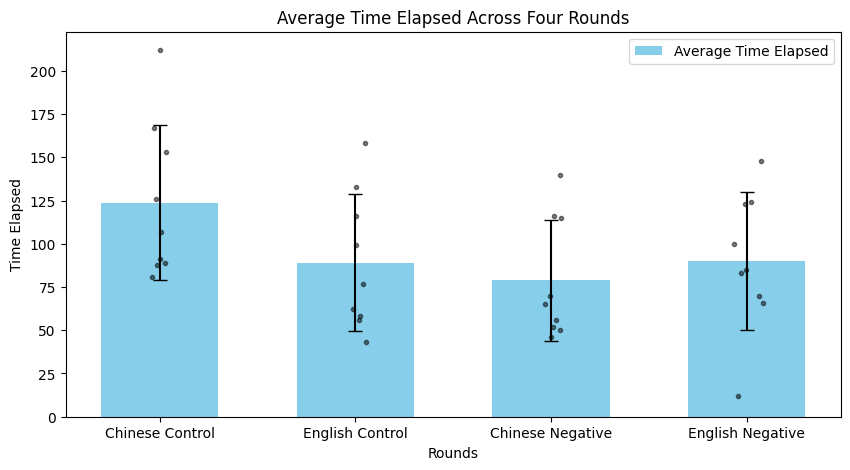

In [2]:
# Extracting specific columns
time_elapsed_columns = ['TimeElapsed1', 'TimeElapsed2', 'TimeElapsed3', 'TimeElapsed4']
stress_rating_columns = ['StressRating1', 'StressRating2', 'StressRating3', 'StressRating4']

# Calculating means and standard deviations for the columns
time_elapsed_means = data[time_elapsed_columns].mean()
time_elapsed_stds = data[time_elapsed_columns].std()

stress_rating_means = data[stress_rating_columns].mean()
stress_rating_stds = data[stress_rating_columns].std()

# Plotting Time Elapsed for the four rounds with SD error bars and individual data points
plt.figure(figsize=(10, 5))
bar_width = 0.6  # Width of the bars

# New labels for rounds
round_labels = ['Chinese Control', 'English Control', 'Chinese Negative', 'English Negative']

# Plotting bars
plt.bar(round_labels, time_elapsed_means, yerr=time_elapsed_stds, color='skyblue', capsize=5, width=bar_width, label='Average Time Elapsed')
# Adding individual points
for i, col in enumerate(time_elapsed_columns):
    y = data[col]
    x = np.random.normal(i, 0.04, size=len(y))  # Adding some jitter to x coordinates for clarity
    plt.plot(x, y, 'k.', alpha=0.5)
plt.title('Average Time Elapsed Across Four Rounds')
plt.xlabel('Rounds')
plt.ylabel('Time Elapsed')
plt.legend()
plt.show()

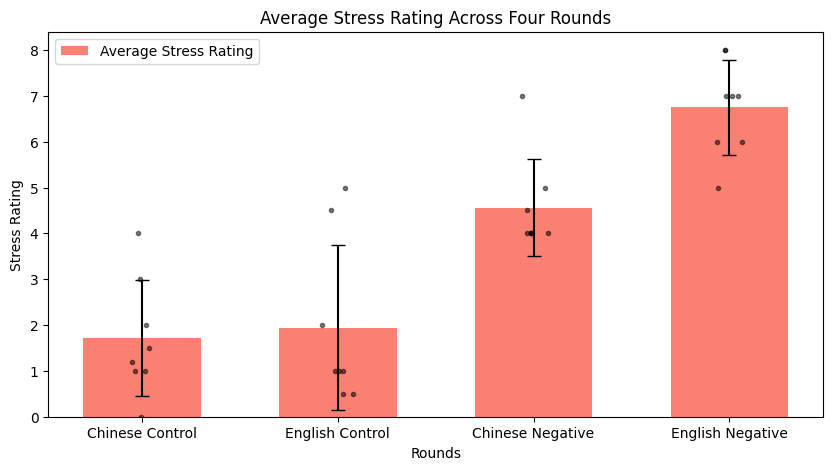

In [3]:
plt.figure(figsize=(10, 5))

# Plotting bars
plt.bar(round_labels, stress_rating_means, yerr=stress_rating_stds, color='salmon', capsize=5, width=bar_width, label='Average Stress Rating')
# Adding individual points
for i, col in enumerate(stress_rating_columns):
    y = data[col]
    x = np.random.normal(i, 0.04, size=len(y))  # Adding some jitter to x coordinates for clarity
    plt.plot(x, y, 'k.', alpha=0.5)
plt.title('Average Stress Rating Across Four Rounds')
plt.xlabel('Rounds')
plt.ylabel('Stress Rating')
plt.legend()
plt.show()

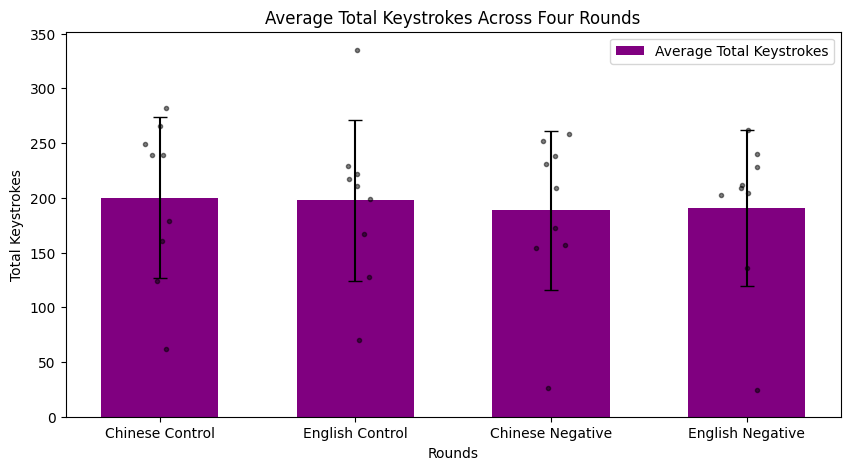

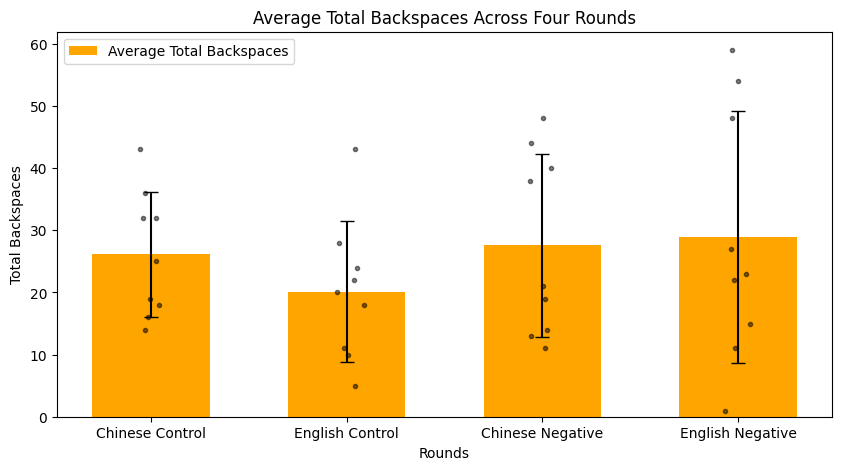

In [3]:
# Extracting specific columns for Total Keystrokes and Total Backspaces
keystrokes_columns = ['TotalKeystrokes1', 'TotalKeystrokes2', 'TotalKeystrokes3', 'TotalKeystrokes4']
backspaces_columns = ['TotalBackspaces1', 'TotalBackspaces2', 'TotalBackspaces3', 'TotalBackspaces4']

# Calculating means and standard deviations
keystrokes_means = data[keystrokes_columns].mean()
keystrokes_stds = data[keystrokes_columns].std()

backspaces_means = data[backspaces_columns].mean()
backspaces_stds = data[backspaces_columns].std()

# Plotting Total Keystrokes
plt.figure(figsize=(10, 5))
plt.bar(round_labels, keystrokes_means, yerr=keystrokes_stds, color='purple', capsize=5, width=bar_width, label='Average Total Keystrokes')
for i, col in enumerate(keystrokes_columns):
    y = data[col]
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'k.', alpha=0.5)
plt.title('Average Total Keystrokes Across Four Rounds')
plt.xlabel('Rounds')
plt.ylabel('Total Keystrokes')
plt.legend()
plt.show()

# Plotting Total Backspaces
plt.figure(figsize=(10, 5))
plt.bar(round_labels, backspaces_means, yerr=backspaces_stds, color='orange', capsize=5, width=bar_width, label='Average Total Backspaces')
for i, col in enumerate(backspaces_columns):
    y = data[col]
    x = np.random.normal(i, 0.04, size=len(y))
    plt.plot(x, y, 'k.', alpha=0.5)
plt.title('Average Total Backspaces Across Four Rounds')
plt.xlabel('Rounds')
plt.ylabel('Total Backspaces')
plt.legend()
plt.show()

### Running some correlation statistics

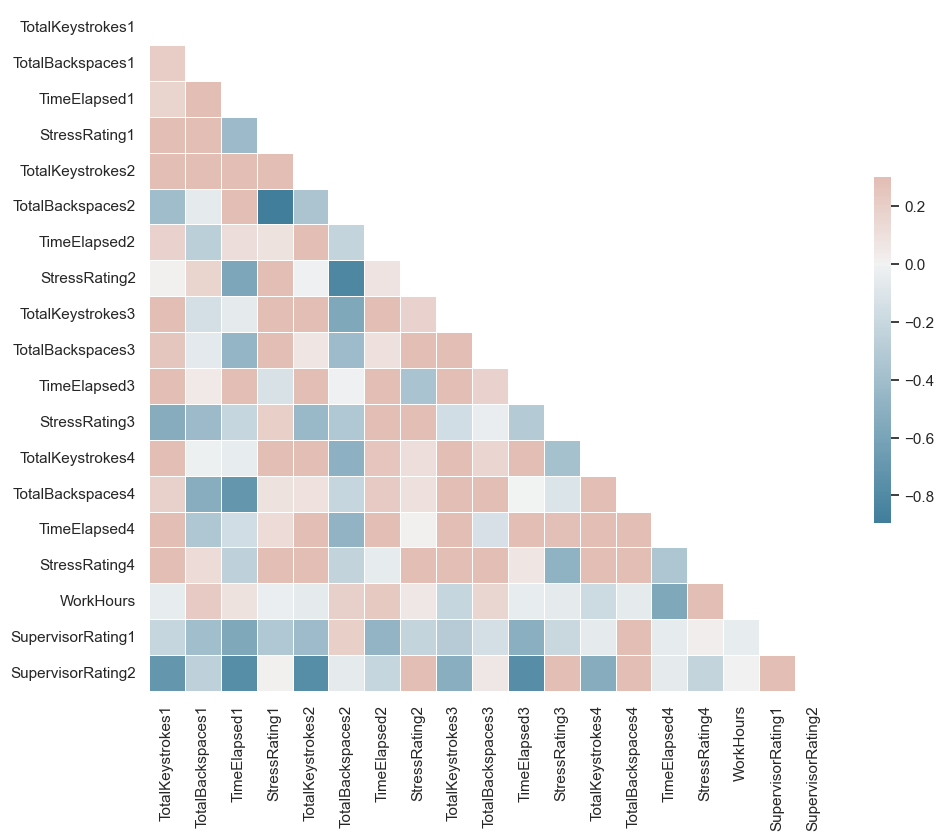

In [4]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Filepath to the CSV
filepath = "/Users/ariel/Desktop/Spring24/525/GUIproject/GUI_DataFiles_old/GUIdataAnalysis.csv"

# Reading the CSV file
data = pd.read_csv(filepath)

# Columns of interest
columns_of_interest = [
    "TotalKeystrokes1", "TotalBackspaces1", "TimeElapsed1", "StressRating1",
    "TotalKeystrokes2", "TotalBackspaces2", "TimeElapsed2", "StressRating2",
    "TotalKeystrokes3", "TotalBackspaces3", "TimeElapsed3", "StressRating3",
    "TotalKeystrokes4", "TotalBackspaces4", "TimeElapsed4", "StressRating4",
    "WorkHours", "SupervisorRating1", "SupervisorRating2"
]

# Selecting data
selected_data = data[columns_of_interest]

# Compute the correlation matrix
corr = selected_data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

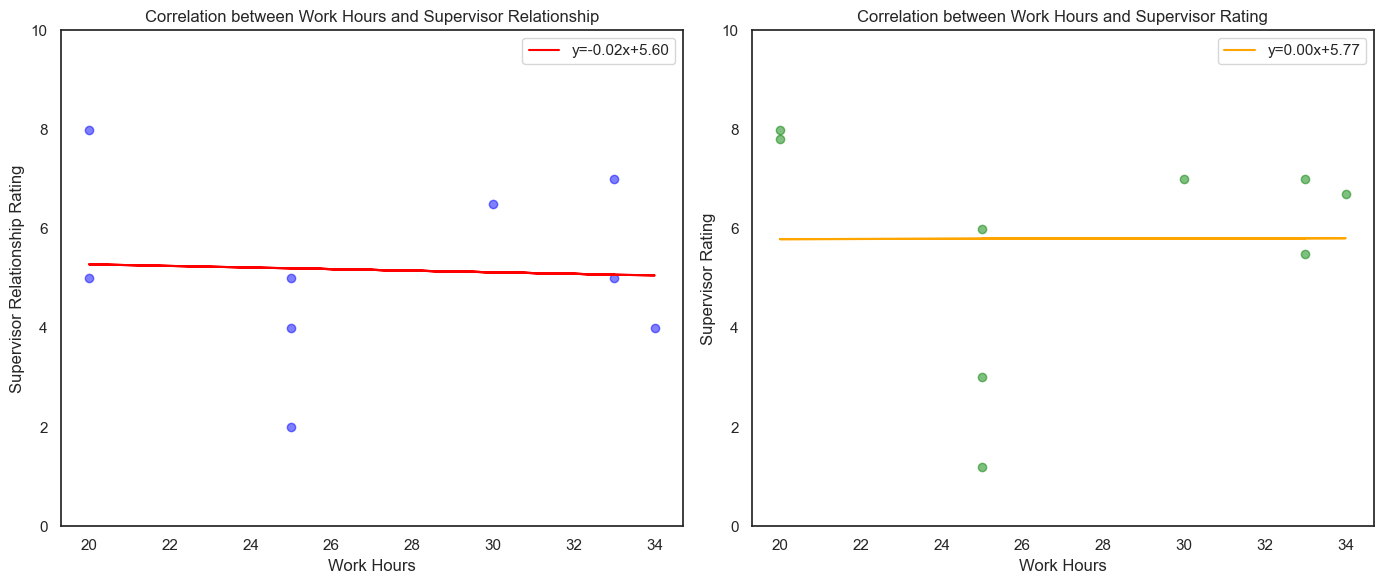

In [6]:
# Plotting scatter plots with correlation lines
plt.figure(figsize=(14, 6))

# Scatter plot and correlation line for Work Hours vs Supervisor Relationship
ax1 = plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(data['WorkHours'], data['SupervisorRating1'], alpha=0.5, color='blue')
plt.title('Correlation between Work Hours and Supervisor Relationship')
plt.xlabel('Work Hours')
plt.ylabel('Supervisor Relationship Rating')

# Calculate the line of best fit
m1, b1 = np.polyfit(data['WorkHours'], data['SupervisorRating1'], 1)
# Plot the line of best fit
plt.plot(data['WorkHours'], m1*data['WorkHours'] + b1, color='red', label=f'y={m1:.2f}x+{b1:.2f}')
plt.legend()
ax1.set_ylim(0, 10)  # Setting y-axis limits for the first subplot

# Scatter plot and correlation line for Work Hours vs Supervisor Rating
ax2 = plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(data['WorkHours'], data['SupervisorRating2'], alpha=0.5, color='green')
plt.title('Correlation between Work Hours and Supervisor Rating')
plt.xlabel('Work Hours')
plt.ylabel('Supervisor Rating')

# Calculate the line of best fit
m2, b2 = np.polyfit(data['WorkHours'], data['SupervisorRating2'], 1)
# Plot the line of best fit
plt.plot(data['WorkHours'], m2*data['WorkHours'] + b2, color='orange', label=f'y={m2:.2f}x+{b2:.2f}')
plt.legend()
ax2.set_ylim(0, 10)  # Setting y-axis limits for the second subplot

plt.tight_layout()
plt.show()

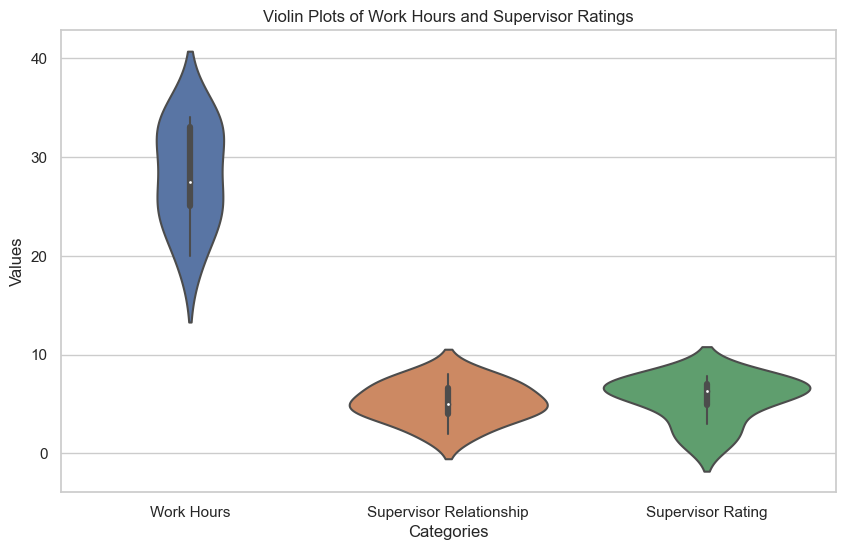

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filepath to the CSV
filepath = "/Users/ariel/Desktop/Spring24/525/GUIproject/GUI_DataFiles_old/GUIdataAnalysis.csv"

# Reading the CSV file
data = pd.read_csv(filepath)

# Setting the style of seaborn for better aesthetics
sns.set(style="whitegrid")

# Create a DataFrame specifically for plotting
plot_data = data[['WorkHours', 'SupervisorRating1', 'SupervisorRating2']]
plot_data.columns = ['Work Hours', 'Supervisor Relationship', 'Supervisor Rating']

# Melting the DataFrame to use with seaborn's violinplot
plot_data_melted = plot_data.melt(var_name='Category', value_name='Value')

# Plotting violin plots
plt.figure(figsize=(10, 6))
sns.violinplot(x='Category', y='Value', data=plot_data_melted)
plt.title('Violin Plots of Work Hours and Supervisor Ratings')
plt.ylabel('Values')
plt.xlabel('Categories')
plt.show()